In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

In [33]:
drive.mount('/content/drive')
url ='/content/drive/MyDrive/Datasets/train.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
cols = list(pd.read_csv(url, nrows =1))
print(cols)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [35]:
data = pd.read_csv(url, usecols=['PassengerId','Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])

In [36]:
data.shape

(891, 9)

In [37]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [38]:
data.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,887,0,2,male,27.0,0,0,13.00,S
887,888,1,1,female,19.0,0,0,30.00,S
888,889,0,3,female,NaN,1,2,23.45,S
889,890,1,1,male,26.0,0,0,30.00,C
890,891,0,3,male,32.0,0,0,7.75,Q


In [39]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
categorical_columns = [c for c in data.columns if data[c].dtype.name ==
'object']
print(categorical_columns)

['Sex', 'Embarked']


In [41]:
numerical_columns = [c for c in data.columns if data[c].dtype.name !=
'object']
print(numerical_columns)

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [42]:
data[categorical_columns].describe()

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


In [43]:
data.describe(include=[object])

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


In [44]:
for c in categorical_columns:
    print(data[c].unique())

['male' 'female']
['S' 'C' 'Q' nan]


In [45]:
from pandas.plotting import scatter_matrix

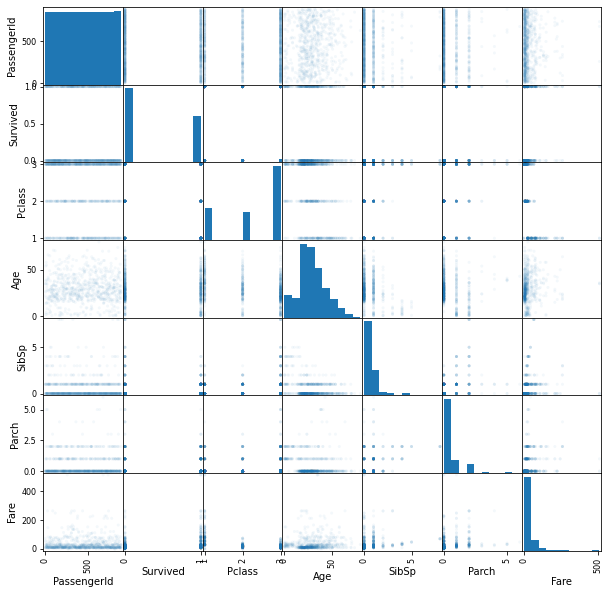

In [46]:
scatter_matrix(data, alpha=0.05, figsize=(10, 10));

In [47]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [48]:
data.count(axis=0)

PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            714
SibSp          891
Parch          891
Fare           891
Embarked       889
dtype: int64

In [49]:
data = data.fillna(data.median(axis=0), axis=0)

<ipython-input-49-4634965d352c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.median(axis=0), axis=0)


In [50]:
data.count(axis=0)

PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            891
SibSp          891
Parch          891
Fare           891
Embarked       889
dtype: int64

In [51]:
data_describe = data.describe(include=[object])
for c in categorical_columns:
  data[c] = data[c].fillna(data_describe[c]['top'])

In [52]:
data.describe(include=[object])

,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


In [53]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
binary_columns = [c for c in categorical_columns if
data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if
data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Sex'] ['Embarked']


In [55]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [56]:
data['Sex'] = data['Sex'].replace(['male'], 0)
data['Sex'] = data['Sex'].replace(['female'], 1)
data['Sex'].describe()

count    891.000000
mean       0.352413
std        0.477990
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Sex, dtype: float64

In [57]:
data['Sex'].unique()

array([0, 1])

In [58]:
data_describe = data.describe(include=[object])
data_describe

,Embarked
count,891
unique,3
top,S
freq,646


In [59]:
for c in binary_columns[1:]:
  top = data_describe[c]['top']
  top_items = data[c] == top
  data.loc[top_items, c] = 0
  data.loc[np.logical_not(top_items), c] = 1
data[binary_columns].describe()

,Sex
count,891.000000
mean,0.352413
std,0.477990
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [60]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [61]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype='object')


In [63]:
data.describe(include=[object])

,Embarked
count,891
unique,3
top,S
freq,646


In [64]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,6.379733e-17,-1.794300e-17,-7.575933e-17,2.232906e-16,3.588600e-17,4.585433e-17,-1.196200e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.729137e+00,-7.888293e-01,-1.565228e+00,-2.222908e+00,-4.742788e-01,-4.734077e-01,-6.480577e-01
25%,-8.645684e-01,-7.888293e-01,-3.691575e-01,-5.654189e-01,-4.742788e-01,-4.734077e-01,-4.888737e-01
50%,0.000000e+00,-7.888293e-01,8.269128e-01,-1.045787e-01,-4.742788e-01,-4.734077e-01,-3.571902e-01
75%,8.645684e-01,1.266279e+00,8.269128e-01,4.330683e-01,4.325504e-01,-4.734077e-01,-2.423274e-02
max,1.729137e+00,1.266279e+00,8.269128e-01,3.889370e+00,6.780355e+00,6.970233e+00,9.661740e+00


In [65]:
data = pd.concat((data_numerical, data[binary_columns], data_nonbinary),
axis=1)
data = pd.DataFrame(data, dtype=float)
print(data.shape)
print(data.columns)

(891, 11)
Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [66]:
X = data.drop(('PassengerId'), axis=1)
y = data['PassengerId']
feature_names = X.columns
print(feature_names)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [67]:
print(X.shape)
print(y.shape)
N, d = X.shape

(891, 10)
(891,)


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =
0.3, random_state = 11)

In [69]:
N_train, _ = X_train.shape
N_test, _ = X_test.shape
print(N_train, N_test)

623 268
